Connected to Python 3.13.7

# MATTEO OLIVER BEKINK 
## Machine Learning II Kaggle Competition

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm as normal
import numpy as np
import os
import pandas as pd

PROJECT_DIR = "C:\\Users\\matte\\OneDrive\\Documents\\UC3M\\UC3M_Notes\\Machine_Learning II\\Kaggle_Competition"

from data_viz import read_data

### Reading the data FUNCTION

In [8]:
# def read_data(file_name):
#     """Reads numerical data from a text file."""
#     file_path = os.path.join(PROJECT_DIR,'data', file_name)
#     data = pd.read_csv(file_path,index_col=0)
#     return data

### Plotting the data histogram FUNCTION

In [9]:
def plot_histogram(data, column, bins=30,ax=None):

    """Plots a histogram of the specified column in the data."""
    data_arr = data[column].to_numpy()
    
    data_arr = data_arr[~np.isnan(data_arr)]  # Remove NaN values
    
    # Convert boolean to integer if necessary
    if data_arr.dtype == bool:
        data_arr = data_arr.astype(int)
        print("Converted boolean to integer.")
    

    if ax is None:
        fig, ax = plt.subplots()
    ax.hist(data_arr, bins=bins, color='blue', alpha=0.7)
    
    ax.set_title(f'Histogram of {column}')
    ax.grid(True)


### Plotting the data normal distribution FUNCTION

In [69]:
def plot_norm(data, column,ax):
    """Plots a normal probability plot of the specified column in the data."""
    data_arr = data[column].to_numpy()
    
    # Convert boolean to integer if necessary
    if data_arr.dtype == bool:
        data_arr = data_arr.astype(int)
        print("Converted boolean to integer.")

    norm_mean = np.mean(data_arr)
    norm_std = np.std(data_arr)

    print(f'Normalized Mean: {norm_mean}\nNormalized Std Dev: {norm_std}')

    domain = np.linspace(norm_mean - 3*norm_std, norm_mean + 3*norm_std, 100)

    p = normal.pdf(domain, loc=norm_mean, scale=norm_std)
    ax.plot(domain, p, color='red')
    ax.scatter(data_arr, np.zeros_like(data_arr), alpha=0.5)
    ax.set_title(f'Normal Probability Plot of {column}')
    ax.grid(True)

### Plot the histograms of each feature 
We do this to get an idea of the nature of each feature 

In [11]:
train_set = read_data('train_set.csv')
test_set = read_data('test_set.csv')

print("Training set size:")
print(train_set.shape)

print(train_set.columns)
print("Number of features:", len(train_set.columns))

# Check if there are any nan values in the dataset
print("Number of NaN values in training set:\n", train_set.isna().sum())
    

Data directory: C:\Users\matte\OneDrive\Documents\UC3M\UC3M_Notes\Machine_Learning II\Kaggle_Competition\data\train_set.csv
Data directory: C:\Users\matte\OneDrive\Documents\UC3M\UC3M_Notes\Machine_Learning II\Kaggle_Competition\data\test_set.csv
Training set size:
(1500, 28)
Index(['target', 'feat_0', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5',
       'feat_6', 'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26'],
      dtype='object')
Number of features: 28
Number of NaN values in training set:
 target      0
feat_0      0
feat_1      0
feat_2      0
feat_3      0
feat_4      0
feat_5      0
feat_6      0
feat_7     84
feat_8      0
feat_9     86
feat_10     0
feat_11     0
feat_12     0
feat_13    86
feat_14     0
feat_15    85
feat_16     0
feat_17    84
feat_18     0
feat_19     0
feat_20     

In [12]:
## Clean the training set from NaN values
train_set_no_nan = train_set.dropna()
print(f"All Nans dropped : {all(train_set_no_nan.isna().sum() == 0)}")
print("Percentage of Nan rows dropped:", 100 * (1 - len(train_set_no_nan) / len(train_set)))

# Percentage of NaN values in each column
nan_percentage = train_set.isna().sum() / len(train_set) * 100
print("Percentage of NaN values in each column:\n", nan_percentage)

All Nans dropped : True
Percentage of Nan rows dropped: 33.06666666666666
Percentage of NaN values in each column:
 target     0.000000
feat_0     0.000000
feat_1     0.000000
feat_2     0.000000
feat_3     0.000000
feat_4     0.000000
feat_5     0.000000
feat_6     0.000000
feat_7     5.600000
feat_8     0.000000
feat_9     5.733333
feat_10    0.000000
feat_11    0.000000
feat_12    0.000000
feat_13    5.733333
feat_14    0.000000
feat_15    5.666667
feat_16    0.000000
feat_17    5.600000
feat_18    0.000000
feat_19    0.000000
feat_20    0.000000
feat_21    0.000000
feat_22    0.000000
feat_23    0.000000
feat_24    5.533333
feat_25    5.533333
feat_26    0.000000
dtype: float64


Converted boolean to integer.


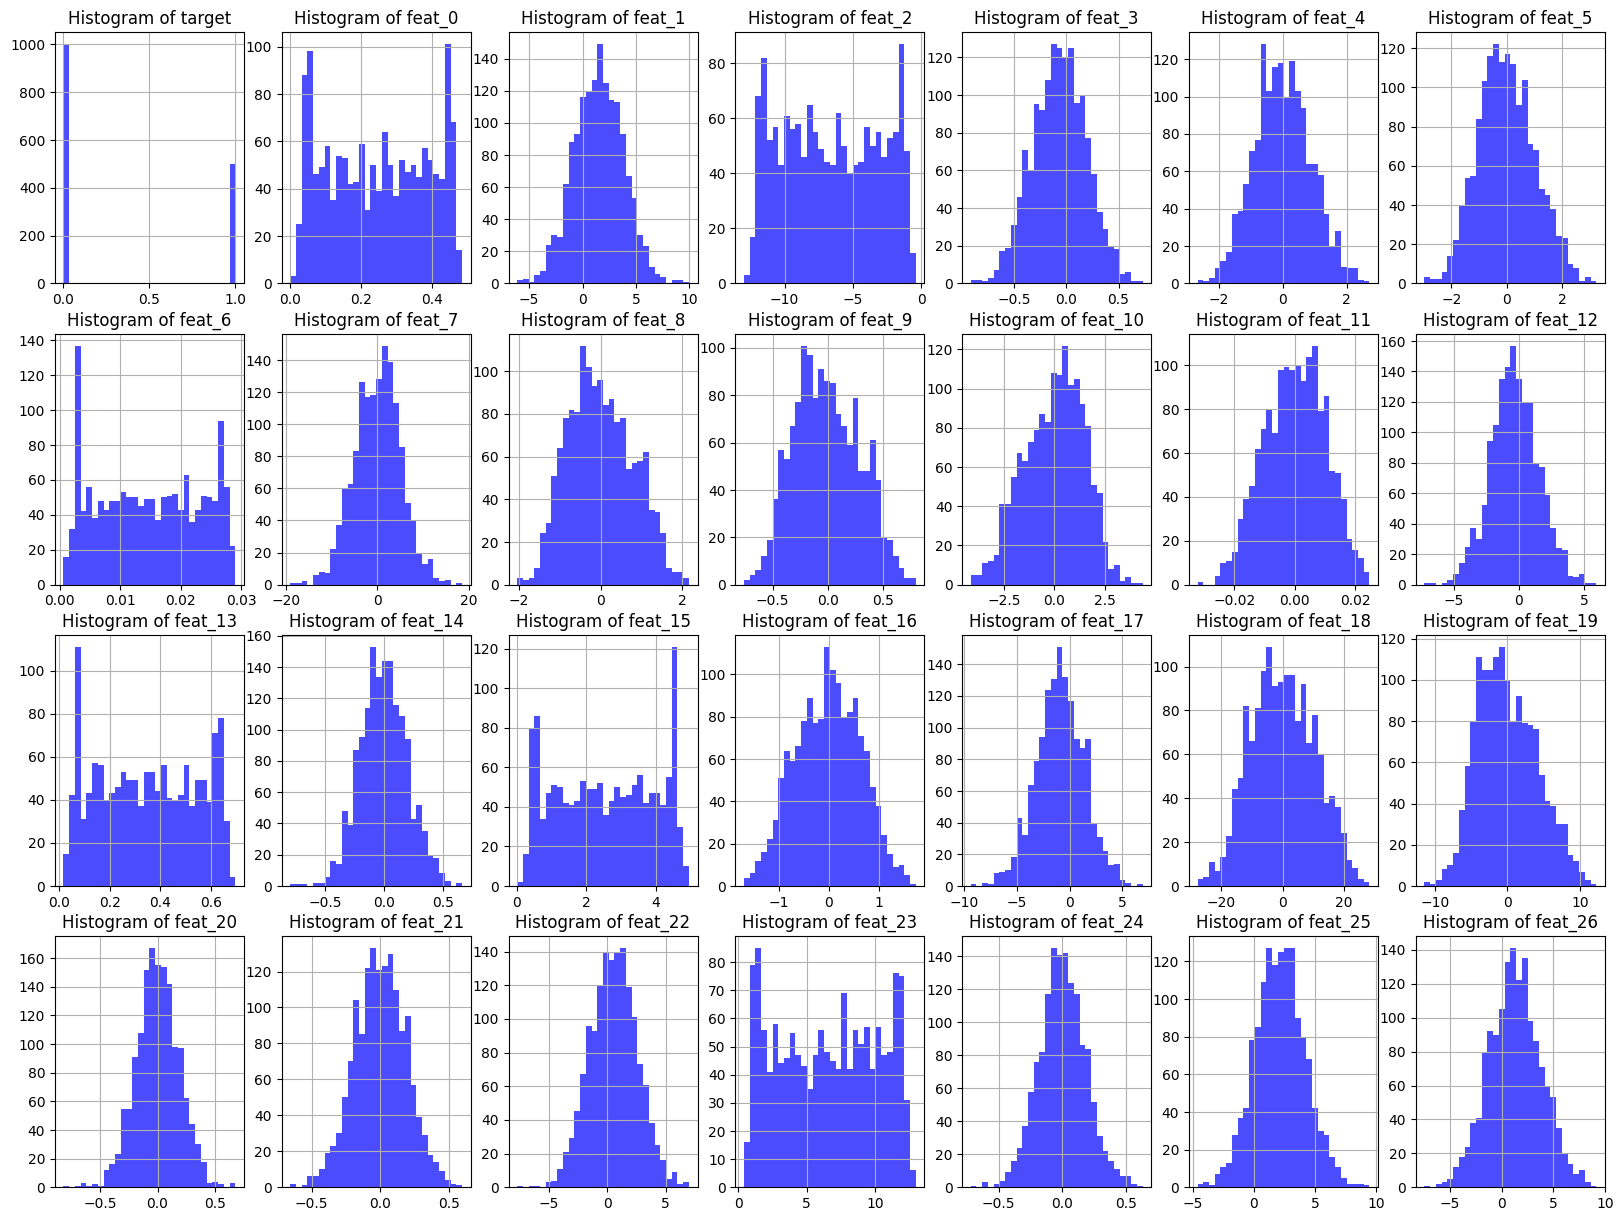

In [13]:
fig,ax = plt.subplots(4,7,figsize=(20,15))
for i,column in enumerate(train_set.columns):
    plot_histogram(train_set, column,ax=ax[i//7,i%7])


### Conclusions from the histograms
From the histograms, we can tell that some features do not exhibit Gaussian behaviour:
* feat_0, feat_2, feat_6, feat_13, feat_15, feat_23
These features seem **uniform** with an addition of **random noise**. 

The next steps are to check the covariance matrix and see how the features are connected to one another

### Covariance Matrix

In [14]:

# Find the covariance matrix
cov_arr = train_set_no_nan.cov().to_numpy()
print("Covariance Array Shape:", cov_arr.shape)
cov_matrix = pd.DataFrame(cov_arr, index=train_set_no_nan.columns, columns=train_set_no_nan.columns)
print("Covariance Matrix:")
print(cov_matrix)


Covariance Array Shape: (28, 28)
Covariance Matrix:
           target    feat_0    feat_1     feat_2    feat_3    feat_4  \
target   0.224828 -0.018492 -0.047990  -0.495264 -0.024928 -0.148408   
feat_0  -0.018492  0.019976 -0.001073   0.066504  0.004272  0.023393   
feat_1  -0.047990 -0.001073  5.279886  -0.021086  0.000026  0.028456   
feat_2  -0.495264  0.066504 -0.021086  12.410884  0.319441  0.617168   
feat_3  -0.024928  0.004272  0.000026   0.319441  0.067308  0.032006   
feat_4  -0.148408  0.023393  0.028456   0.617168  0.032006  0.779808   
feat_5  -0.238868  0.032953  0.085977   0.999982  0.065704  0.334876   
feat_6  -0.002299  0.000322  0.000282   0.012968  0.000652  0.002963   
feat_7  -0.059232  0.009976 -0.150640  -0.099629  0.007981  0.103813   
feat_8   0.135256 -0.016715 -0.071926  -1.756096 -0.082655 -0.199431   
feat_9  -0.078988  0.011411  0.016811   0.550614  0.024046  0.113069   
feat_10 -0.170099  0.019744  0.096135   3.062857  0.127059  0.267001   
feat_11  0.0

### EXPERIMENTAL (RECONSTRUCTING NaN DATA)

In [72]:
# filter to rows with nan values
train_set_nan = train_set[train_set.isna().any(axis=1)]
print(f'Training set rows with NaN values: {train_set_nan.shape}')

# Compute the mean and covariance of all features EXCLUDING target
# We exclude target because it's a label, not a feature to impute
features_only = train_set_no_nan.iloc[:, 1:]  # Skip target (column 0)
means = features_only.mean()
cov = features_only.cov().to_numpy()

# Create a mapping: DataFrame column index -> means/cov index
OFFSET = 1  # target column index

print(f'Means shape: {means.shape}')
print(f'Covariance shape: {cov.shape}')
print(f'Column offset from DataFrame to means/cov: {OFFSET}')


Training set rows with NaN values: (496, 28)
Means shape: (27,)
Covariance shape: (27, 27)
Column offset from DataFrame to means/cov: 1


## IMPUTED DATA V1

In [141]:
imputed_vector_1 = np.zeros_like(train_set_nan.values)
print(f'Shape of nan data: {train_set_nan.shape}')
print(f'Shape of imputed vector: {imputed_vector_1.shape}')

for pos, (index, row) in enumerate(train_set_nan.iterrows()):
    observed = row.index[~row.isna()].tolist()
    missing = row.index[row.isna()].tolist()

    # Get column indices for missing and observed features
    missing_indices = train_set_nan.columns.get_indexer(missing)
    observed_indices = train_set_nan.columns.get_indexer(observed)
    
    # Filter out the 'target' column (index 0)
    missing_indices = missing_indices[missing_indices > 0]
    observed_indices = observed_indices[observed_indices > 0]
    
    for missing_idx in missing_indices:
        # Use OFFSET to convert DataFrame column index to means/cov index
        means_idx = missing_idx - OFFSET
        obs_means_idx = observed_indices - OFFSET
        
        mu_m = means.iloc[means_idx]
        mu_0_list = [means.iloc[idx] for idx in obs_means_idx]
        
        # Covariance-based imputation
        mo_submatrix = np.ix_(np.array([means_idx]), obs_means_idx)
        oo_submatrix = np.ix_(obs_means_idx, obs_means_idx)

        cov_mo = cov[mo_submatrix]
        cov_oo = cov[oo_submatrix]

        # Extract the observed vector
        x_0 = row.iloc[observed_indices].to_numpy()

        # Compute deviation vector 
        delta_0 = x_0 - np.array(mu_0_list)
        
        # Compute the correction term
        c = cov_mo @ np.linalg.inv(cov_oo) @ delta_0

        # Impute the missing value using positional index
        imputed_vector_1[pos, missing_idx] = mu_m + c[0]

print("Imputation complete!")
print(imputed_vector_1[0,:])

Shape of nan data: (496, 28)
Shape of imputed vector: (496, 28)
Imputation complete!
[0 0 0 0 0 0 0 0 0 0 np.float64(-0.2818763141877039) 0 0 0 0 0
 np.float64(3.5125316821832473) 0 0 0 0 0 0 0 0 0 0 0]


In [142]:
train_set_imputed = train_set_nan.copy()

imputed_DF = pd.DataFrame(imputed_vector_1, columns=train_set_nan.columns, index=train_set_nan.index)

print(train_set_imputed.shape)
print(imputed_DF.shape)

nan_mask = train_set_imputed.isna()
train_set_imputed[nan_mask] = imputed_DF[nan_mask]

##TEST CASE
# test_idx = 2
# test_set = train_set_imputed.iloc[test_idx,:]
# test_imputed = imputed_DF.iloc[test_idx,:]

# test_set_after = test_set.copy()

# test_set_after[test_set.isna()] = test_imputed[test_set.isna()]

# print(f"At index {train_set_imputed.index[test_idx]}:")
# for col in train_set_imputed.columns:
#     print(f'Column: {col}, Before: {test_set[col]}, Imputed: {test_imputed[col]}, After: {test_set_after[col]}')

# print("Results before and after are the same:", all(test_set_after == train_set_imputed.iloc[test_idx,:]))

print(f"All Nans dropped : {all(train_set_imputed.isna().sum() == 0)}")

(496, 28)
(496, 28)
All Nans dropped : True


C:\Users\matte\AppData\Local\Temp\ipykernel_12944\3325724239.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[[np.float64(0.07573112293636425)]
 [np.float64(0.08197826772506012)]
 [np.float64(0.10726368663486746)]
 [np.float64(-0.04226796195190036)]
 [np.float64(0.18145127352749957)]
 [np.float64(-0.04483567231916419)]
 [np.float64(0.2516683801753855)]
 [np.float64(0.8676831502600313)]
 [np.float64(1.901955818268241)]
 [np.float64(0.3334515915098645)]
 [np.float64(0.7422223190762326)]
 [np.float64(0.6198015246459643)]
 [np.float64(-1.0544282872460715)]
 [np.float64(-0.3346130953636245)]
 [np.float64(0.5839389718481441)]
 [np.float64(0.2546121547552045)]
 [np.float64(0.5689730415659526)]
 [np.float64(-1.6575332398008906)]
 [np.float64(-1.8657006418999624)]
 [np.float64(0.1470004178621689)]
 [np.float64(0.8178008034750182)]
 [np.float64(0.49865522177353516)]
 [np.float64(0.08751004382740576)]
 [np.floa

## IMPUTED V2

In [147]:
# Copy so we can modify it safely
imputed_df = train_set_nan.copy()
imputed_vector_2 = np.zeros_like(train_set_nan.values)
print(f'Shape of imputed vector: {imputed_vector_2.shape}')

for pos, (index, row) in enumerate(imputed_df.iterrows()):

    # Get feature column names (exclude target column 0)
    missing  = row.index[( row.isna()) & (row.index != 'target')].tolist()

    # Iterate over missing features
    for missing_col in missing:
        observed = row.index[(~row.isna()) & (row.index != 'target')].tolist()
        print(f'Imputing row {index}, missing column: {missing_col}')

        # Convert column name -> column index in features
        missing_idx = train_set.columns.get_loc(missing_col)
        means_idx = missing_idx - 1  # shift for target

        # Observed indices (shifted)
        observed_indices_df = [train_set.columns.get_loc(c) for c in observed]
        obs_means_idx = np.array(observed_indices_df) - 1

        # Pull mean values
        mu_m = means.iloc[means_idx]
        mu_o = means.iloc[obs_means_idx].to_numpy()

        # Subset covariance matrix
        cov_mo = cov[np.ix_([means_idx], obs_means_idx)]  # (1 × k)
        cov_oo = cov[np.ix_(obs_means_idx, obs_means_idx)] # (k × k)

        # Observed feature values
        x_o = row.iloc[observed_indices_df].to_numpy()

        # Compute deviation
        delta = x_o - mu_o

        # Compute correction term
        correction = cov_mo @ np.linalg.inv(cov_oo) @ delta

        # Conditional mean imputation
        imputed_value = mu_m + correction[0]

        # Update row in our DataFrame copy
        imputed_df.at[index, missing_col] = imputed_value

        imputed_vector_2[pos, missing_idx] = imputed_value

        # Also update row array so next missing feature sees the new value
        row[missing_col] = imputed_value

        print(len(observed))

print("Conditional mean imputation complete!")
print("Any nans left?:", imputed_df.isna().sum().sum() > 0)

Shape of imputed vector: (496, 28)
Imputing row 2, missing column: feat_9
25
Imputing row 2, missing column: feat_15
26
Imputing row 3, missing column: feat_17
26
Imputing row 6, missing column: feat_9
26
Imputing row 8, missing column: feat_15
26
Imputing row 10, missing column: feat_15
26
Imputing row 12, missing column: feat_15
26
Imputing row 13, missing column: feat_15
26
Imputing row 16, missing column: feat_15
26
Imputing row 18, missing column: feat_9
26
Imputing row 20, missing column: feat_17
26
Imputing row 26, missing column: feat_7
26
Imputing row 36, missing column: feat_7
25
Imputing row 36, missing column: feat_24
26
Imputing row 37, missing column: feat_7
26
Imputing row 40, missing column: feat_9
26
Imputing row 43, missing column: feat_25
26
Imputing row 46, missing column: feat_24
26
Imputing row 47, missing column: feat_17
26
Imputing row 49, missing column: feat_25
26
Imputing row 51, missing column: feat_24
26
Imputing row 56, missing column: feat_9
26
Imputing r

Check the imputed values fall within the plots of each feature

Row 0 imputed indices: [10 16]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.2818763141877039
Imputed value 2: -0.2818763141877039


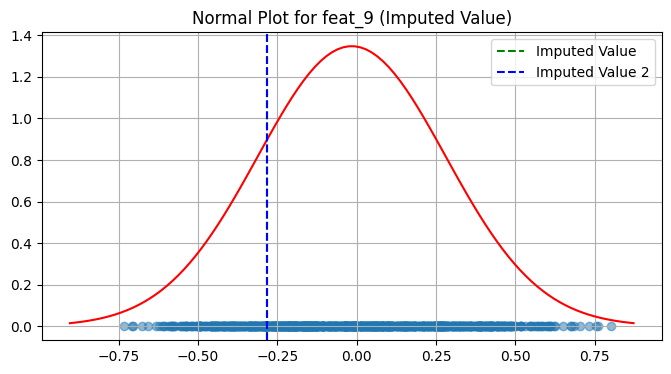

Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 3.5125316821832473
Imputed value 2: 3.512531682182874


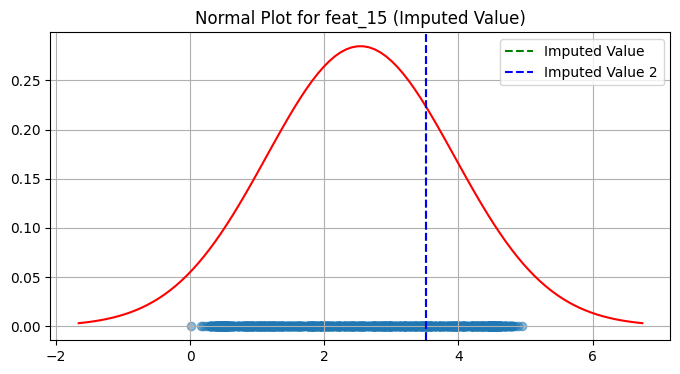

Row 1 imputed indices: [18]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -0.6528313447965604
Imputed value 2: -0.6528313447965604


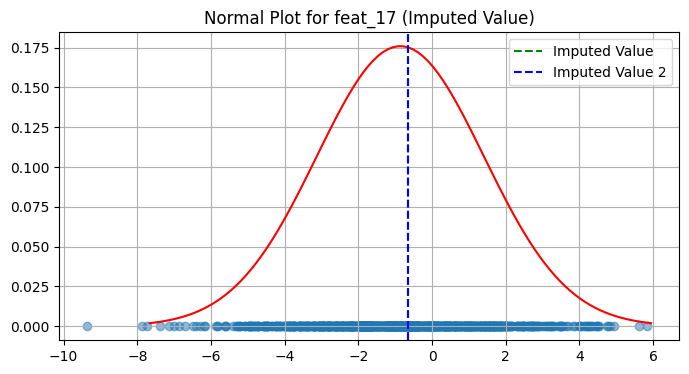

Row 2 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.21280981568187374
Imputed value 2: -0.21280981568187374


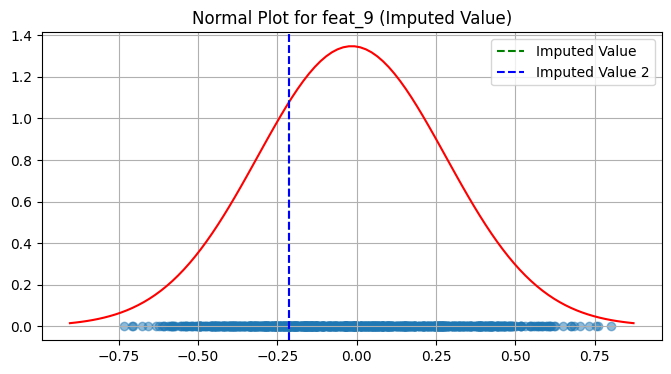

Row 3 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 3.2635167136587655
Imputed value 2: 3.2635167136587655


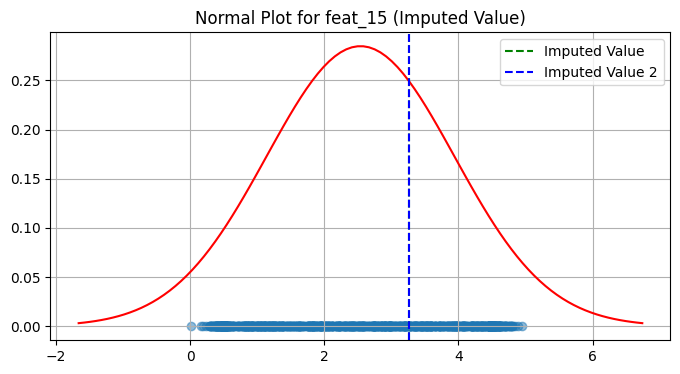

Row 4 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 3.418260390637022
Imputed value 2: 3.418260390637022


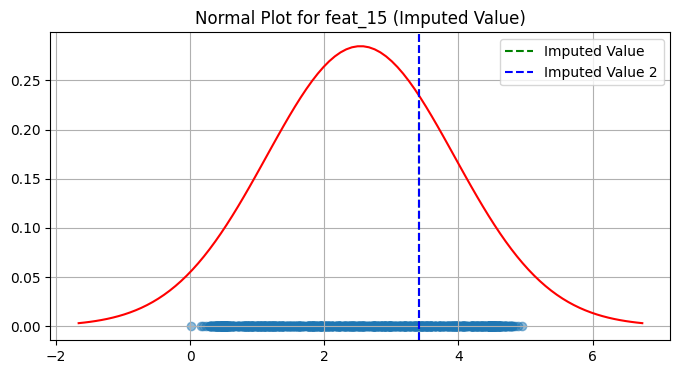

Row 5 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 3.905779256927384
Imputed value 2: 3.905779256927384


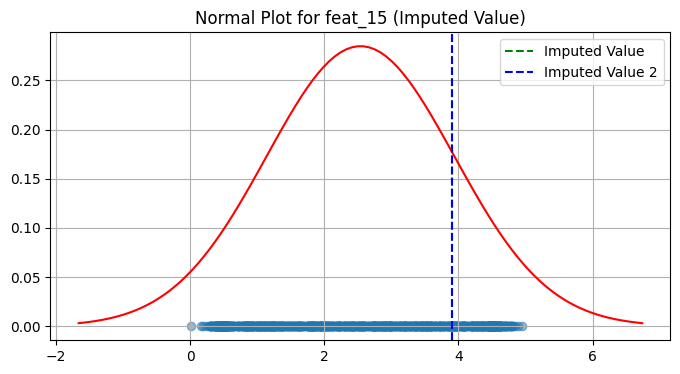

Row 6 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 1.8162858788330931
Imputed value 2: 1.8162858788330931


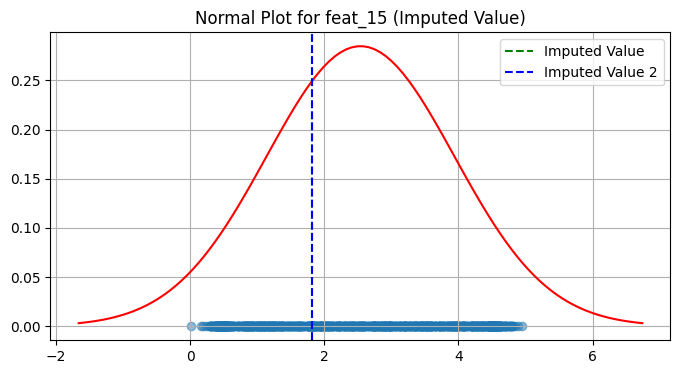

Row 7 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 2.7747899006481016
Imputed value 2: 2.7747899006481016


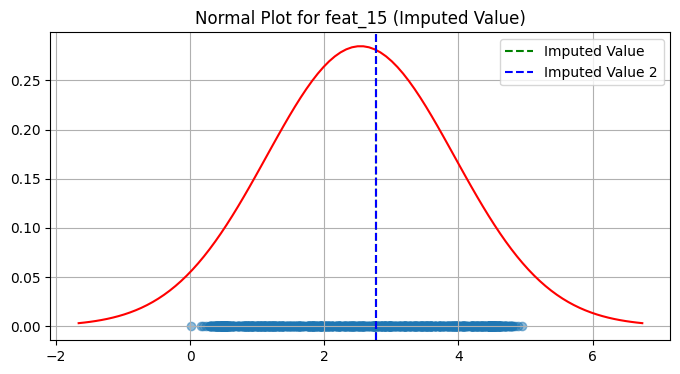

Row 8 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.13981538588322442
Imputed value 2: -0.13981538588322442


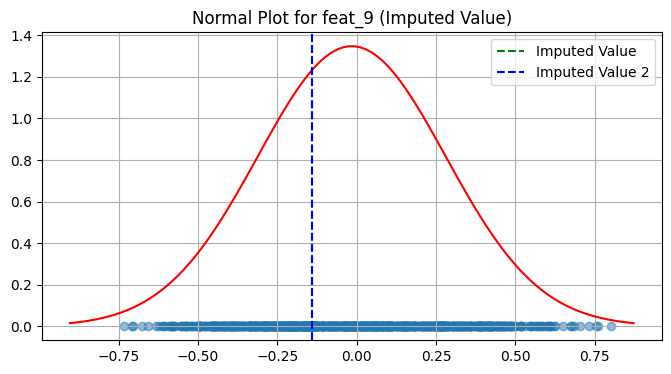

Row 9 imputed indices: [18]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -1.0367821863288003
Imputed value 2: -1.0367821863288003


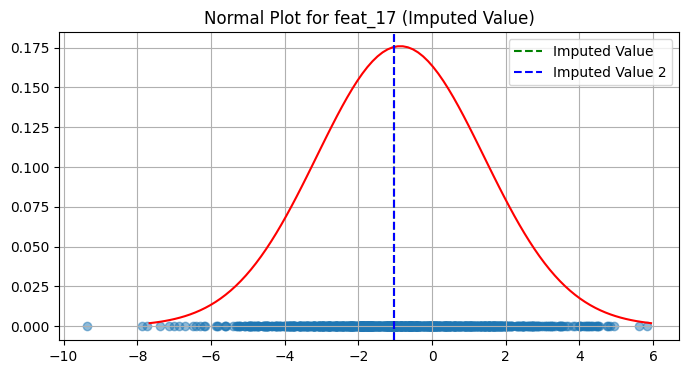

Row 10 imputed indices: [8]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.07573112293636425
Imputed value 2: 0.07573112293636425


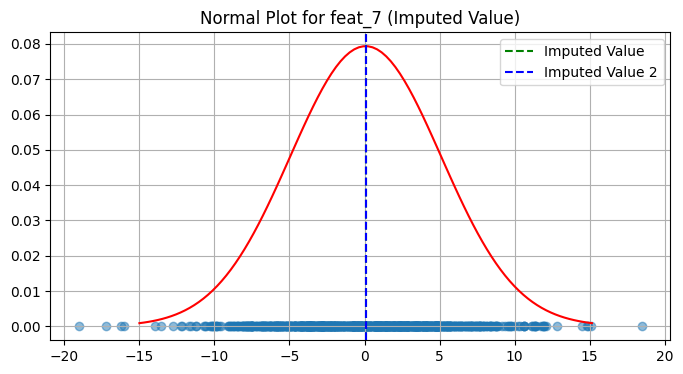

Row 11 imputed indices: [ 8 25]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.08197826772506012
Imputed value 2: 0.08197826772506012


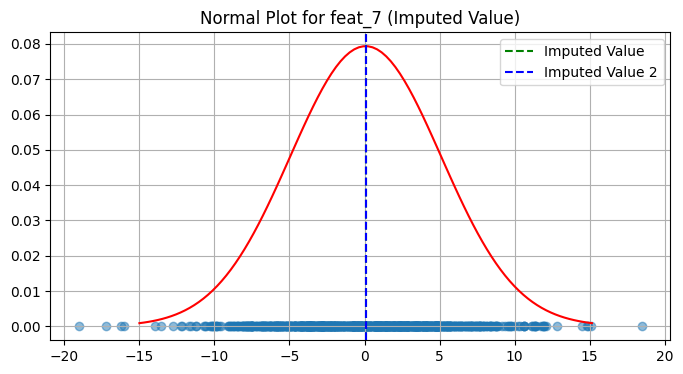

Normalized Mean: -0.000395219123505975
Normalized Std Dev: 0.18315525818998818
Imputed value 1: 0.005678277824788141
Imputed value 2: 0.0056782778247879764


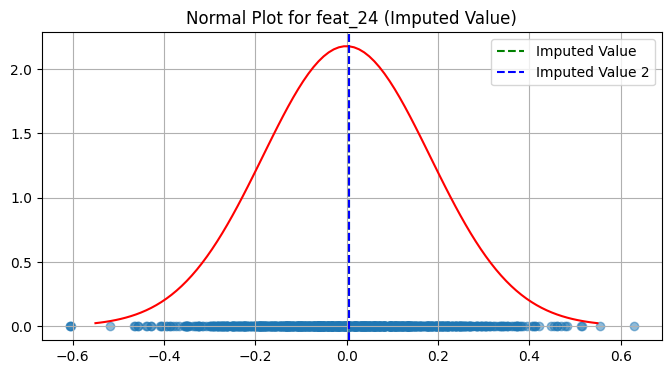

Row 12 imputed indices: [8]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.10726368663486746
Imputed value 2: 0.10726368663486746


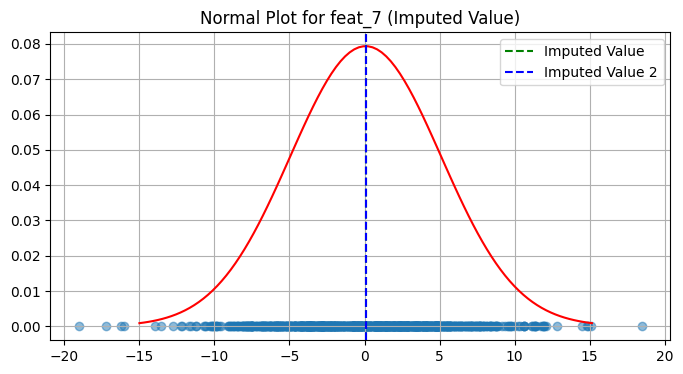

Row 13 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: 0.16430434504315983
Imputed value 2: 0.16430434504315983


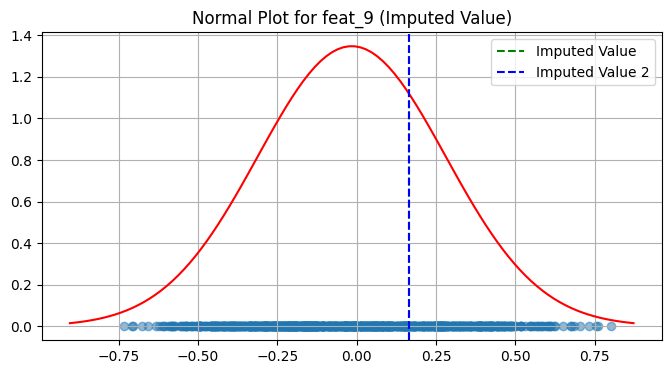

Row 14 imputed indices: [26]
Normalized Mean: 2.22214422310757
Normalized Std Dev: 2.0664340353677852
Imputed value 1: 1.95684722330998
Imputed value 2: 1.95684722330998


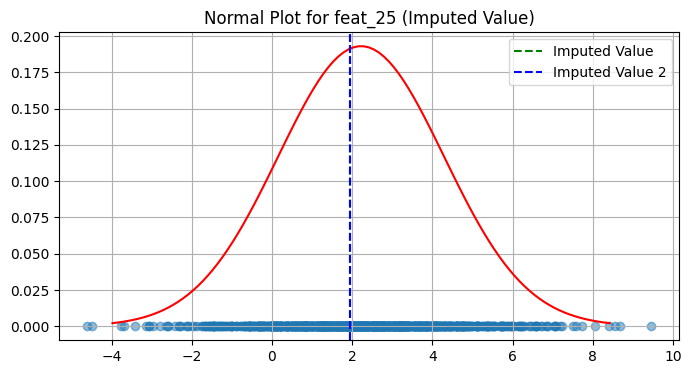

Row 15 imputed indices: [25]
Normalized Mean: -0.000395219123505975
Normalized Std Dev: 0.18315525818998818
Imputed value 1: 0.05114894362702728
Imputed value 2: 0.05114894362702728


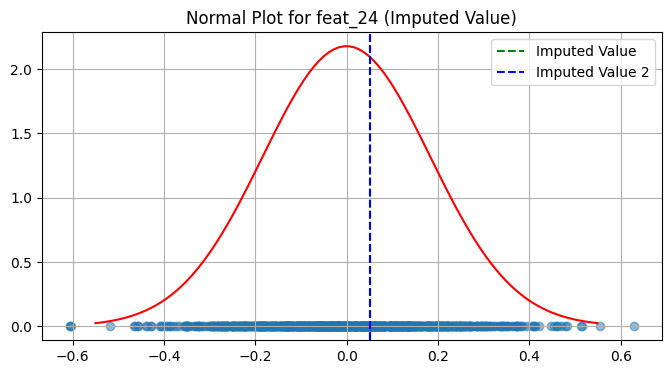

Row 16 imputed indices: [18]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -0.9434548470412778
Imputed value 2: -0.9434548470412778


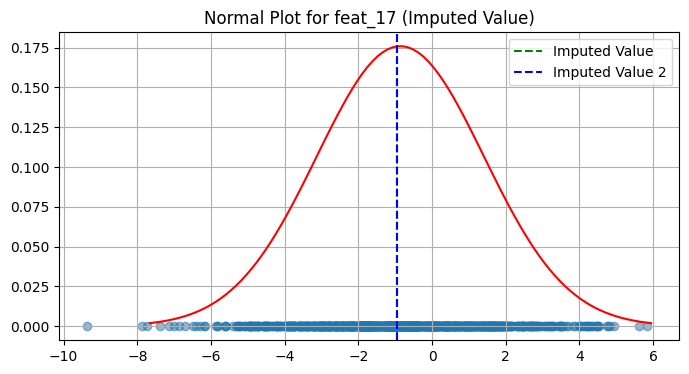

Row 17 imputed indices: [26]
Normalized Mean: 2.22214422310757
Normalized Std Dev: 2.0664340353677852
Imputed value 1: 2.082394678561226
Imputed value 2: 2.082394678561226


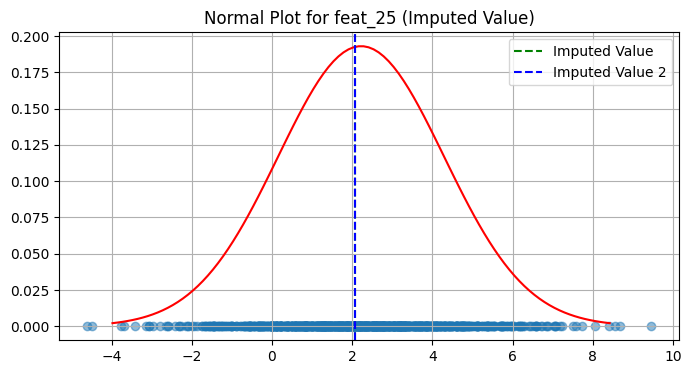

Row 18 imputed indices: [25]
Normalized Mean: -0.000395219123505975
Normalized Std Dev: 0.18315525818998818
Imputed value 1: -0.01979040015151816
Imputed value 2: -0.01979040015151816


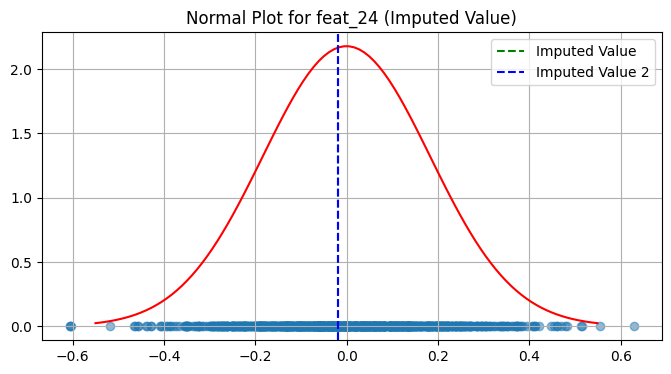

Row 19 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.01966090296269612
Imputed value 2: -0.01966090296269612


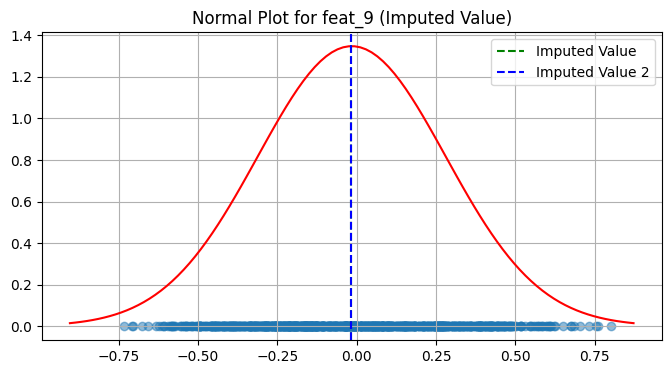

Row 20 imputed indices: [10 16]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.16149921405863663
Imputed value 2: -0.16149921405863663


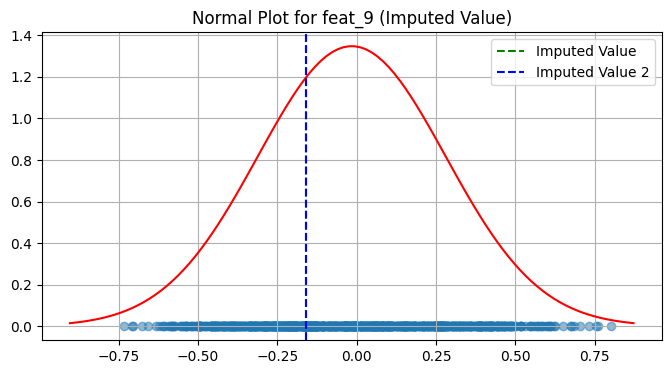

Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 3.2600845401584
Imputed value 2: 3.260084540158222


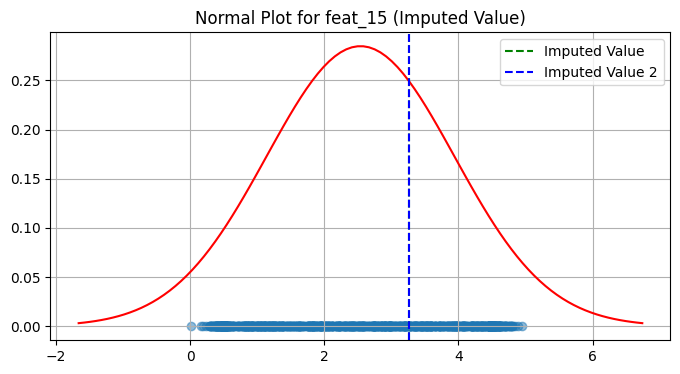

Row 21 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 2.975810489789022
Imputed value 2: 2.975810489789022


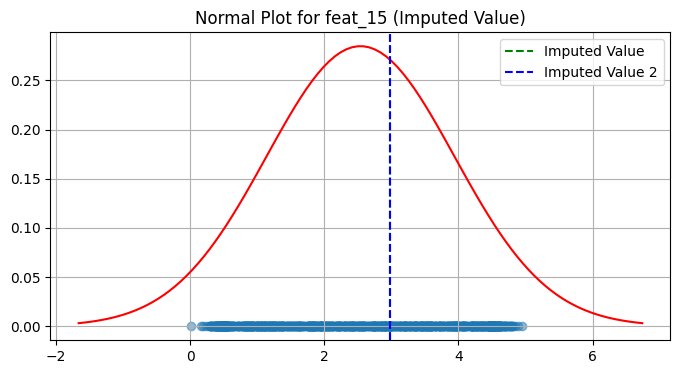

Row 22 imputed indices: [26]
Normalized Mean: 2.22214422310757
Normalized Std Dev: 2.0664340353677852
Imputed value 1: 2.8448558105974233
Imputed value 2: 2.8448558105974233


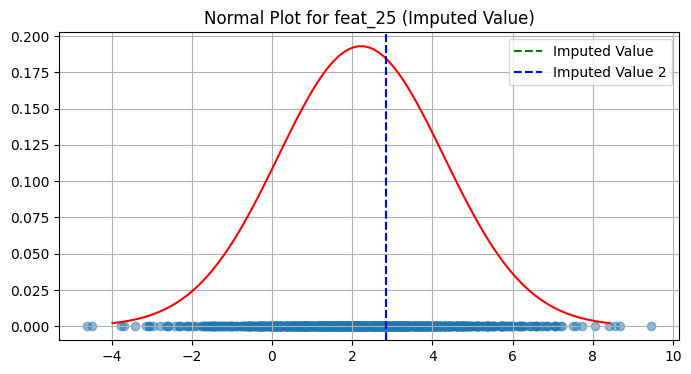

Row 23 imputed indices: [18]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -1.0709848762692185
Imputed value 2: -1.0709848762692185


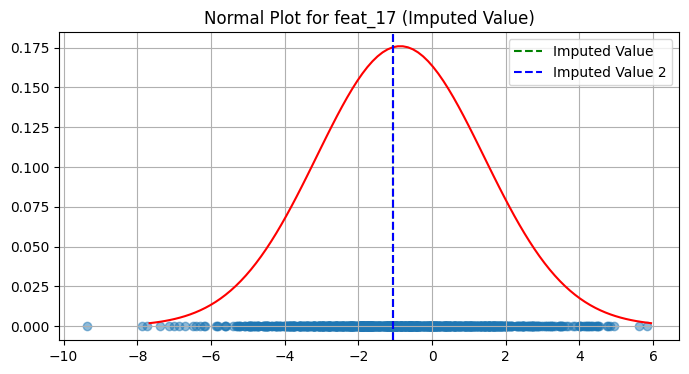

Row 24 imputed indices: [ 8 10]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: -0.04226796195190036
Imputed value 2: -0.04226796195190036


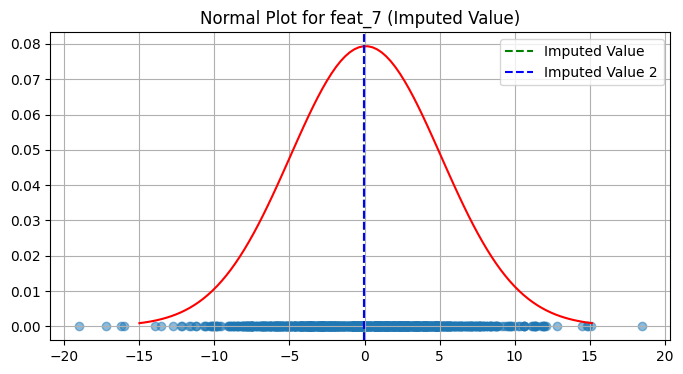

Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.309936718693713
Imputed value 2: -0.3099367186937258


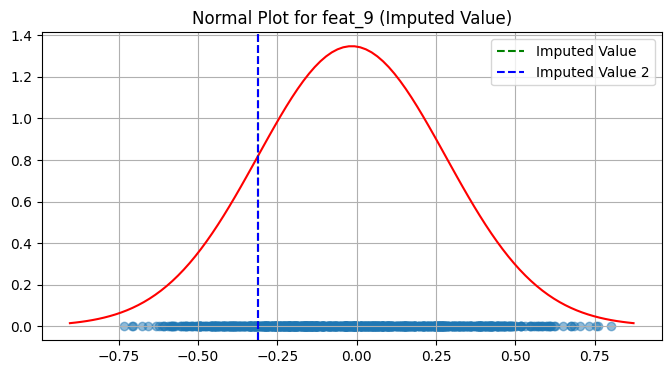

Row 25 imputed indices: [ 8 14]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.18145127352749957
Imputed value 2: 0.18145127352749957


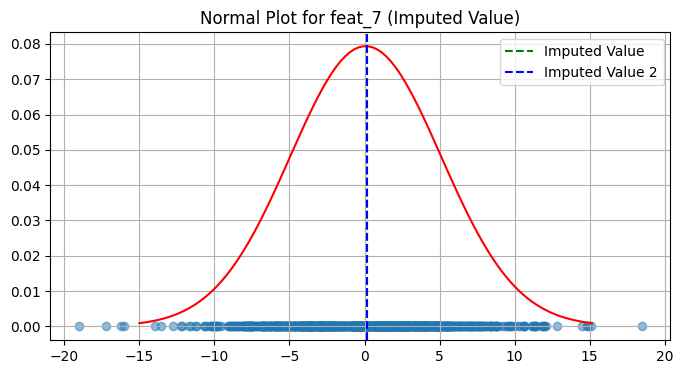

Normalized Mean: 0.3537293824701196
Normalized Std Dev: 0.19325476420431778
Imputed value 1: 0.48017535735903827
Imputed value 2: 0.48017535735902467


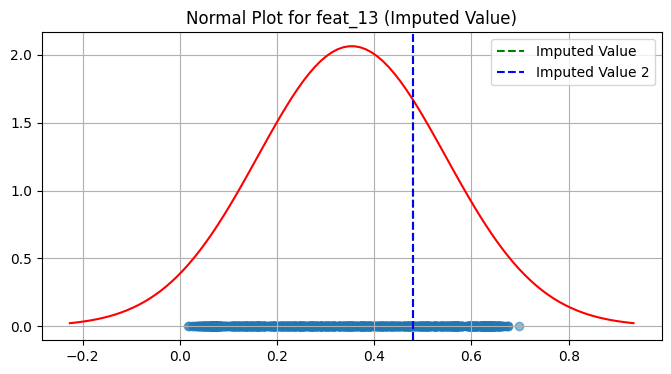

Row 26 imputed indices: [8]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: -0.04483567231916419
Imputed value 2: -0.04483567231916419


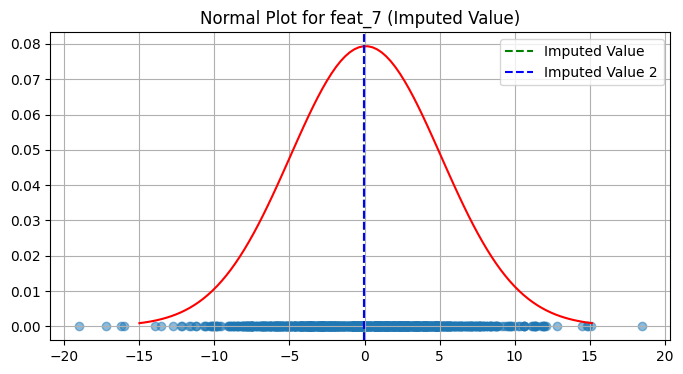

Row 27 imputed indices: [26]
Normalized Mean: 2.22214422310757
Normalized Std Dev: 2.0664340353677852
Imputed value 1: 2.286785164734055
Imputed value 2: 2.286785164734055


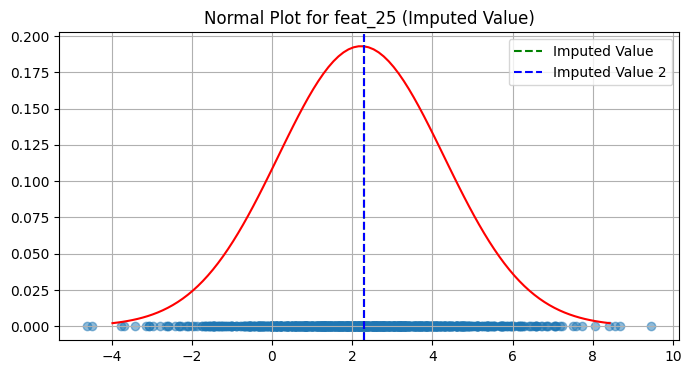

Row 28 imputed indices: [25]
Normalized Mean: -0.000395219123505975
Normalized Std Dev: 0.18315525818998818
Imputed value 1: -0.006480442773381375
Imputed value 2: -0.006480442773381375


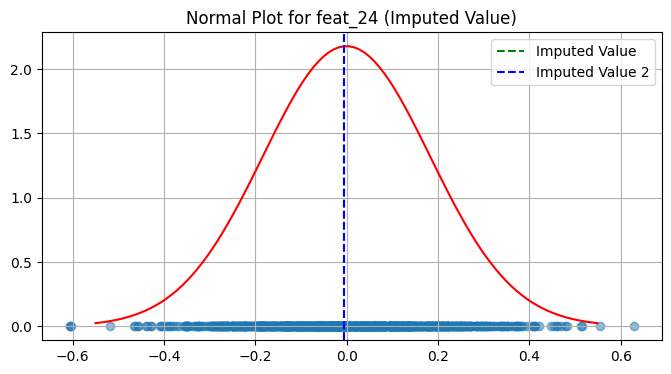

Row 29 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 4.318328007064797
Imputed value 2: 4.318328007064797


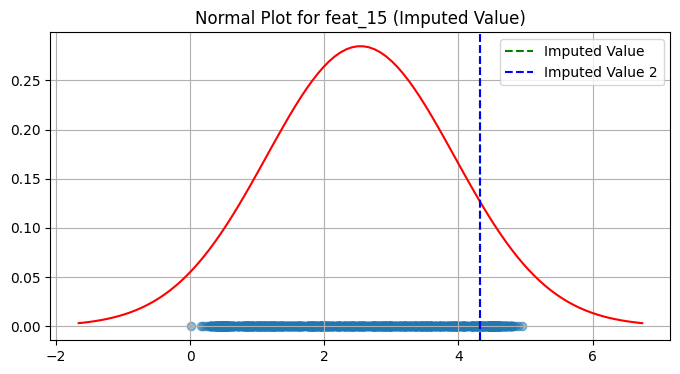

Row 30 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: -0.04039853567705016
Imputed value 2: -0.04039853567705016


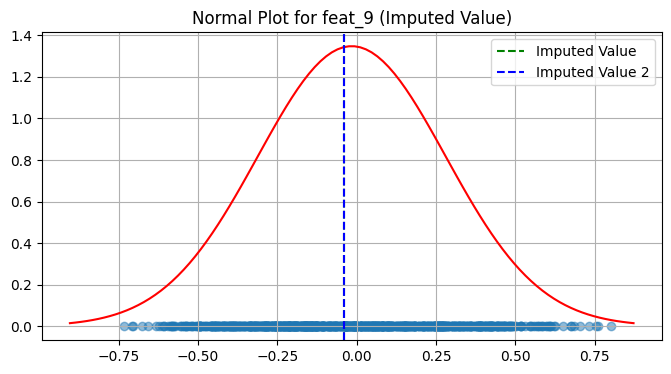

Row 31 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 1.7313166820325112
Imputed value 2: 1.7313166820325112


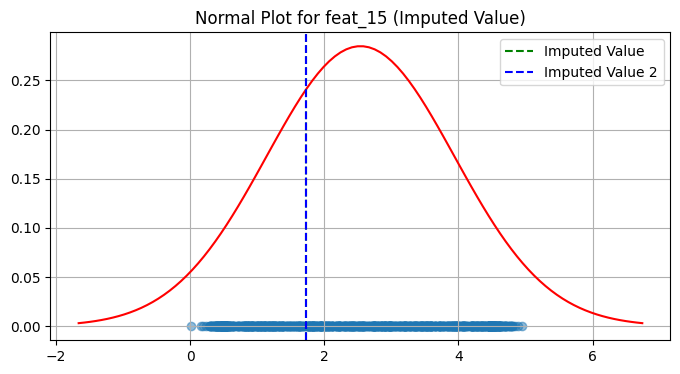

Row 32 imputed indices: [18]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -0.714690353679079
Imputed value 2: -0.714690353679079


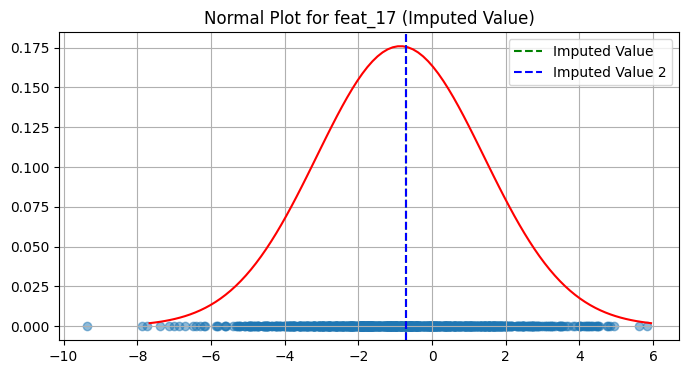

Row 33 imputed indices: [10]
Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: 0.31193212633126693
Imputed value 2: 0.31193212633126693


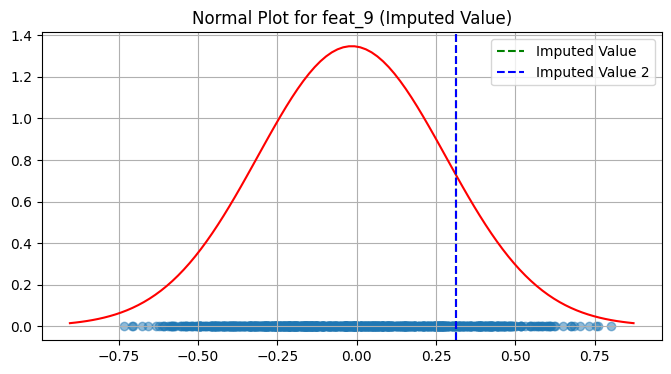

Row 34 imputed indices: [18 25]
Normalized Mean: -0.8625962151394423
Normalized Std Dev: 2.268100319072354
Imputed value 1: -0.4826265151344424
Imputed value 2: -0.4826265151344424


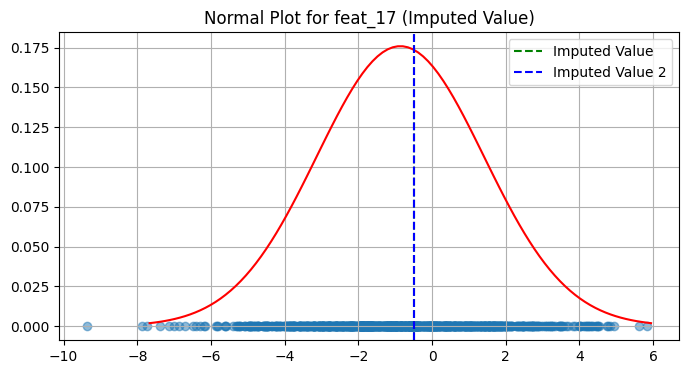

Normalized Mean: -0.000395219123505975
Normalized Std Dev: 0.18315525818998818
Imputed value 1: 0.05677203892873857
Imputed value 2: 0.056772038928737625


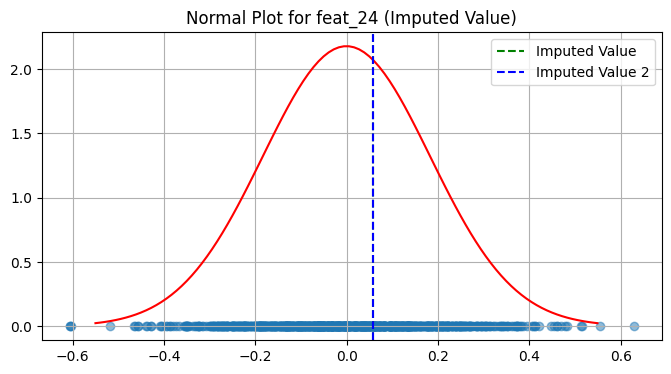

Row 35 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 1.5195486683146489
Imputed value 2: 1.5195486683146489


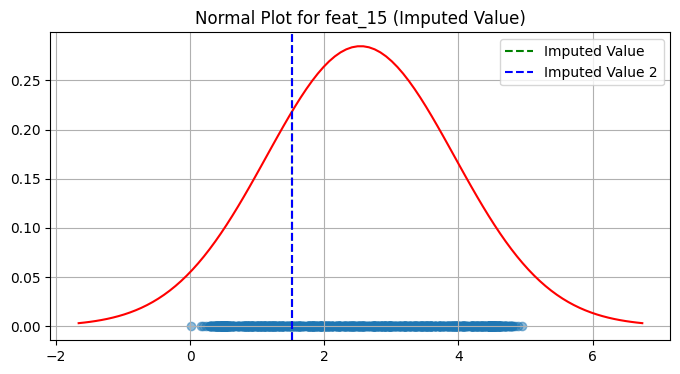

Row 36 imputed indices: [ 8 10]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.2516683801753855
Imputed value 2: 0.2516683801753855


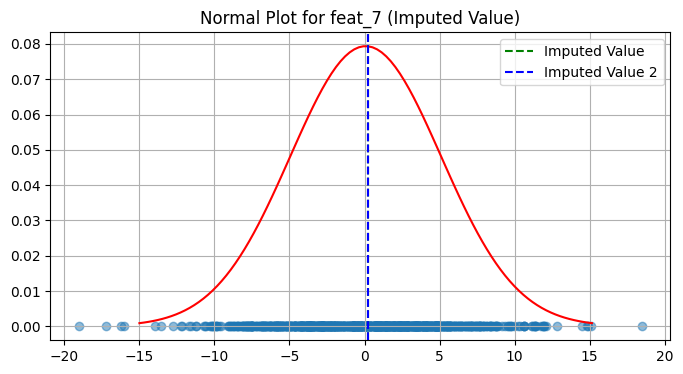

Normalized Mean: -0.01592988047808765
Normalized Std Dev: 0.29604885136411124
Imputed value 1: 0.2800545376475235
Imputed value 2: 0.28005453764753113


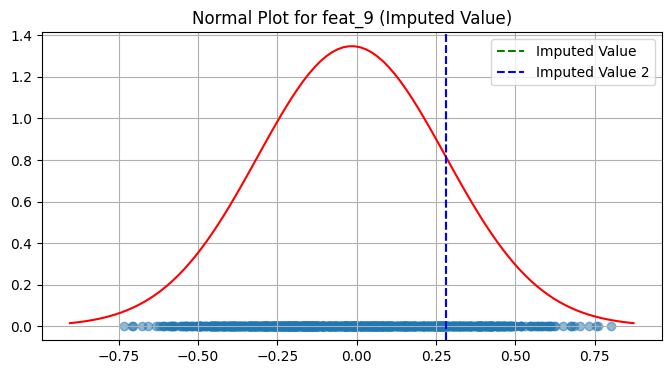

Row 37 imputed indices: [8]
Normalized Mean: 0.07783555776892429
Normalized Std Dev: 5.026290437514687
Imputed value 1: 0.8676831502600313
Imputed value 2: 0.8676831502600313


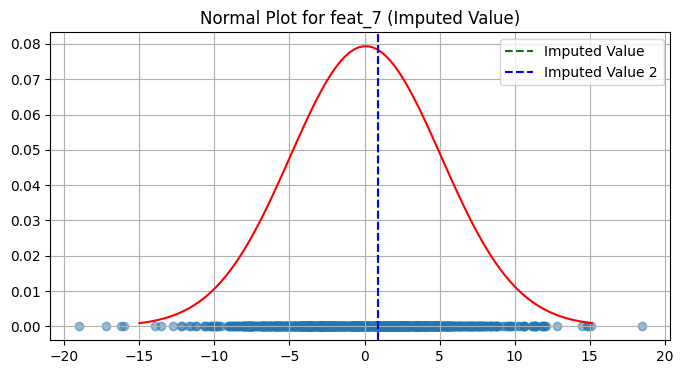

Row 38 imputed indices: [16]
Normalized Mean: 2.5386274900398407
Normalized Std Dev: 1.4006772762106563
Imputed value 1: 2.190165181811091
Imputed value 2: 2.190165181811091


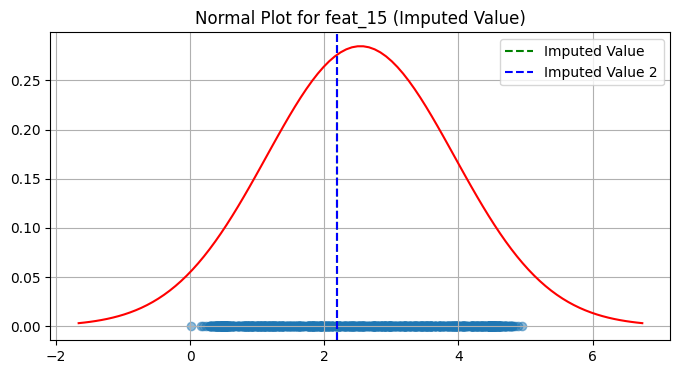

Row 39 imputed indices: [10]


KeyboardInterrupt: 

<Figure size 800x400 with 0 Axes>

In [145]:
# For each row in the imputed_vector, find the non-zero values (imputed features)
# and plot the corresponding normal plot, marking the imputed value

for pos in range(imputed_vector_1.shape[0]):
    # Find indices of imputed (non-zero) features in this row
    imputed_indices = np.where(imputed_vector_1[pos] != 0)[0]
    print(f'Row {pos} imputed indices: {imputed_indices}')
    
    for missing_idx in imputed_indices:
        feature_name = train_set_no_nan.columns[missing_idx]
        fig, ax = plt.subplots(figsize=(8, 4))
        plot_norm(train_set_no_nan, feature_name, ax)
        print(f'Imputed value 1: {imputed_vector_1[pos, missing_idx]}')
        print(f'Imputed value 2: {imputed_vector_2[pos, missing_idx]}')
        ax.axvline(imputed_vector_1[pos, missing_idx], color='green', linestyle='--', label='Imputed Value')
        ax.axvline(imputed_vector_2[pos, missing_idx], color='blue', linestyle='--', label='Imputed Value 2')
        ax.legend()
        ax.set_title(f'Normal Plot for {feature_name} (Imputed Value)')
        plt.show()

Merge full dataset

In [128]:
# if using V2
train_set_imputed = imputed_df.copy()
print(f"All Nans dropped : {all(train_set_imputed.isna().sum() == 0)}")

# Combine the new train_set_imputed with the original train_set_no_nan
full_train_set = pd.concat([train_set_no_nan, train_set_imputed]).sort_index()
full_train_set.head()

All Nans dropped : True


,target,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,...,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26
ID,,,,,,,,,,,,,,,,,,,,,
0,True,0.2616,2.5025,-11.1660,-0.3815,0.2319,-1.4798,0.0072,-4.1052,0.5083,...,-4.982600,-12.1896,1.3346,-0.1038,-0.1328,-0.2646,11.5052,0.1535,0.0963,0.3345
1,True,0.3874,1.0461,-9.4303,0.0100,-0.9858,-0.4959,0.0044,-0.3943,1.0242,...,-1.947100,-8.3548,6.0248,0.0607,-0.1689,-0.1911,9.4314,0.1386,3.7278,-0.5929
2,True,0.2276,5.5317,-10.4569,0.1915,-0.8280,-0.2836,0.0052,-3.8544,0.9625,...,1.228400,-0.8834,2.4716,0.2844,0.0231,-0.4979,10.3966,0.1455,-1.1622,-0.2638
3,False,0.3544,-0.2149,-3.9802,0.1635,0.5326,-0.4676,0.0268,3.0157,-1.4849,...,-0.652831,0.9018,0.2686,0.0460,0.2039,-2.2213,3.6265,-0.1575,1.5227,4.7911
4,False,0.3118,3.2238,-5.9532,-0.0805,1.1114,1.3232,0.0190,3.4671,-0.7132,...,-0.727600,-2.2058,-3.4741,0.2296,-0.1185,1.3222,6.1321,0.3408,1.8497,-0.9679


Save the full dataset to a csv

In [129]:
V1 = False

if V1:
    full_train_set.to_csv(os.path.join(PROJECT_DIR,'data','full_train_set_imputed.csv'))
else:
    full_train_set.to_csv(os.path.join(PROJECT_DIR,'data','full_train_set_imputed_v2.csv'))